In [38]:
import pandas as pd
import quandl
import math
import datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

# from sklearn.model_selection import cross_validate
# from sklearn.cross_validation import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import style

import pickle

style.use('ggplot')

In [44]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [45]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


In [46]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.00

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100.00

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [47]:
forecast_col = 'Adj. Close'

df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

df.dropna(inplace=True)

print(df.tail())

print(forecast_out)

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-30     1177.37  0.896914   -0.029718    1792602.0  1094.00
2018-01-31     1182.22  0.346805   -0.134312    1643877.0  1053.15
2018-02-01     1181.59  0.495942    0.476195    2774967.0  1026.55
2018-02-02     1119.20  1.081129   -0.729098    5798880.0  1054.09
2018-02-05     1068.76  4.325574   -2.893850    3742469.0  1006.94
35


In [48]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X), len(y))

3354 3389


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

ValueError: Found input variables with inconsistent numbers of samples: [3354, 3389]

In [65]:
# clf = LinearRegression(n_jobs = -1)
# clf.fit(X_train, y_train)

# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(clf, f)

    
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)
    
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9786973676214196


In [66]:
svm_clf = svm.SVR()                                        #svm for fun
svm_clf.fit(X_train, y_train)
svm_accuracy = svm_clf.score(X_test, y_test)
print(svm_accuracy)

0.7879259231288468


In [67]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1011.95800293 1014.4900277  1012.84231983 1052.33229156 1056.09437586
 1056.13551862 1065.8915827  1067.02798408 1074.25540222 1066.02227276
 1076.84298525 1071.75992242 1068.40904198 1064.62005053 1065.99522846
 1060.39577795 1072.26049416 1058.49362298 1058.60788325 1074.61041018
 1076.17950748 1080.77057319 1096.25404735 1085.90883041 1058.8650165
 1059.30302739 1047.48688808 1033.2831345  1040.55355209 1055.36326082
 1068.10541286 1072.99381993 1076.05763949 1071.23377059 1075.45535856] 0.9786973676214196 35


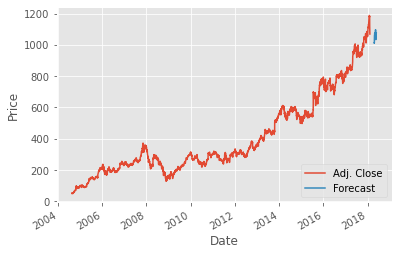

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238       NaN
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414       NaN
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727       NaN
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146       NaN
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849       NaN


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-05-17 16:30:00,NaN,NaN,NaN,NaN,NaN,1068.105413
2018-05-18 16:30:00,NaN,NaN,NaN,NaN,NaN,1072.993820
2018-05-19 16:30:00,NaN,NaN,NaN,NaN,NaN,1076.057639
2018-05-20 16:30:00,NaN,NaN,NaN,NaN,NaN,1071.233771
2018-05-21 16:30:00,NaN,NaN,NaN,NaN,NaN,1075.455359


In [53]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

print(df.head())
df.tail()

In [ ]:
# LinearRegression Math

# y = mx + b

# m = (mean of x * mean of y) - mean of (xy) / (mean of x)^2 - mean of (x^2)

# b = mean of y - m(mean of x)



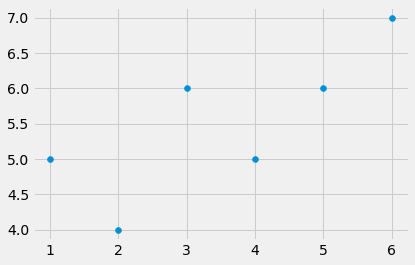

In [12]:
# Linear Regression from scratch

from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import random


xs = [1,2,3,4,5,6]
ys = [5,4,6,5,6,7]

plt.scatter(xs, ys)
plt.show()

In [5]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)

def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs * ys)) / 
         ((mean(xs) * mean(xs)) - mean(xs * xs)) )
    
    b = mean(ys) - m * mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)
print(m)
print(b)

0.42857142857142866
4.0


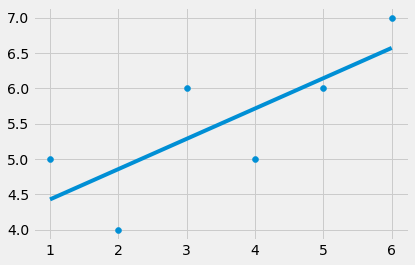

In [6]:
regression_line = [(m * x) + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [7]:
predict_x = 8
predict_y = (m * predict_x) + b

predict_y

7.428571428571429

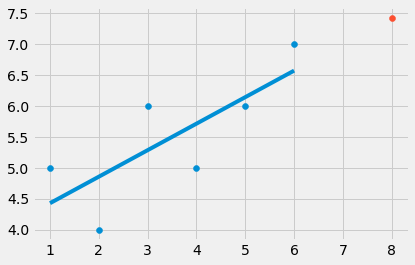

In [8]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()

In [9]:
# R squared theory

# r ^ 2 = 1 - (SE(y line)/SE (mean of ys line) )

# SE = squared error

In [19]:
def squared_error(ys_orig, ys_line):
    return(sum(ys_line - ys_orig) * sum(ys_line - ys_orig) )

def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

print("reg line", regression_line)
print("ys ", ys)

r_squared = coefficient_of_determination(ys, regression_line)

print(r_squared)

reg line [7.889024390243883, 9.858818011257016, 11.828611632270151, 13.798405253283285, 15.76819887429642, 17.737992495309555, 19.707786116322687, 21.677579737335822, 23.647373358348958, 25.61716697936209, 27.586960600375225, 29.55675422138836, 31.52654784240149, 33.49634146341462, 35.46613508442776, 37.435928705440894, 39.405722326454026, 41.375515947467164, 43.345309568480296, 45.315103189493435, 47.28489681050657, 49.2546904315197, 51.22448405253284, 53.19427767354597, 55.1640712945591, 57.13386491557224, 59.10365853658537, 61.0734521575985, 63.04324577861164, 65.01303939962477, 66.98283302063791, 68.95262664165105, 70.92242026266418, 72.8922138836773, 74.86200750469044, 76.83180112570358, 78.80159474671672, 80.77138836772986, 82.741181988743, 84.7109756097561]
ys  [-16.  14.  42.  12.  15.  -1.   9.  45.  55.   1.  54.  36.  33.  35.
  55.  34.  33.  12.  25.   7.  61.  69.  21.  81.  86.  55.  69.  37.
  32.  58.  56.  64.  67.  94.  79.  37.  84.  86. 101. 115.]
0.9936


In [13]:
def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)
    

In [34]:
xs, ys = create_dataset(40, 40, 2, correlation = 'pos')

1.8546904315197001
-3.6414634146341527


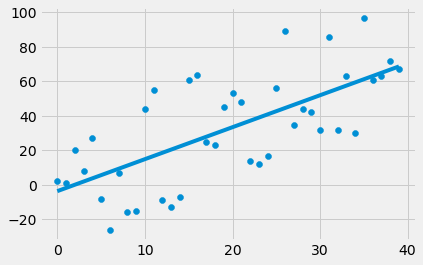

In [35]:
m, b = best_fit_slope_and_intercept(xs, ys)
print(m)
print(b)

regression_line = [(m * x) + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

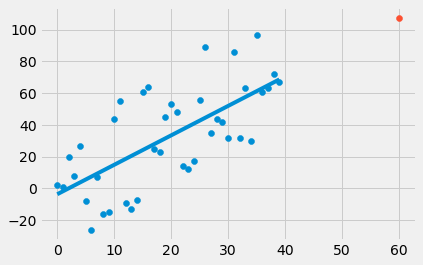

In [36]:
predict_x = 60
predict_y = (m * predict_x) + b

predict_y

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()

In [37]:
r_squared = coefficient_of_determination(ys, regression_line)

print(r_squared)

0.9997398543184183
